# Data Preprocessing
Description of columns

Sno - Number of reported Case

Date - YYYY-MM-DD

Time - HH:MM AM/PM

State/UnionTerritory - Indian States or Union Territories

ConfirmedIndianNational - Confirmed corona cases of Indian National

ConfirmedForeignNational - Confirmed corona cases of Foreign National

Cured - Recovered from Covid-19

Deaths - Deaths due to Covid-19

Confirmed - Confirmed corona cases

# Necessary Imports and Mounting Data

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Loading Data into Dataframe

In [2]:
df = pd.read_csv("covid_19_india.csv")
df1 = pd.read_csv("StatewiseTestingDetails.csv")
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


This dataset provides day by record of number of cases found in a specific state in India from 30th Jan 2020 till 11 August 2021. It contains 18110 entries and 9 features.

In [34]:
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Here, we can see that dataset has no missing values in this dataset which will make analyzing it easier.

In [4]:
df_recent = df[df['Date'] == '2021-08-11']
df_recent.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18074,18075,2021-08-11,8:00 AM,Andaman and Nicobar Islands,-,-,7412,129,7548
18075,18076,2021-08-11,8:00 AM,Andhra Pradesh,-,-,1952736,13564,1985182
18076,18077,2021-08-11,8:00 AM,Arunachal Pradesh,-,-,47821,248,50605
18077,18078,2021-08-11,8:00 AM,Assam,-,-,559684,5420,576149
18078,18079,2021-08-11,8:00 AM,Bihar,-,-,715352,9646,725279


In [5]:
df_recent['Confirmed'].sum()

32036511

After preprocessing the dataset we see that India has total of 31,695,958 cases as of 11 August 2021

# Statewise Figures

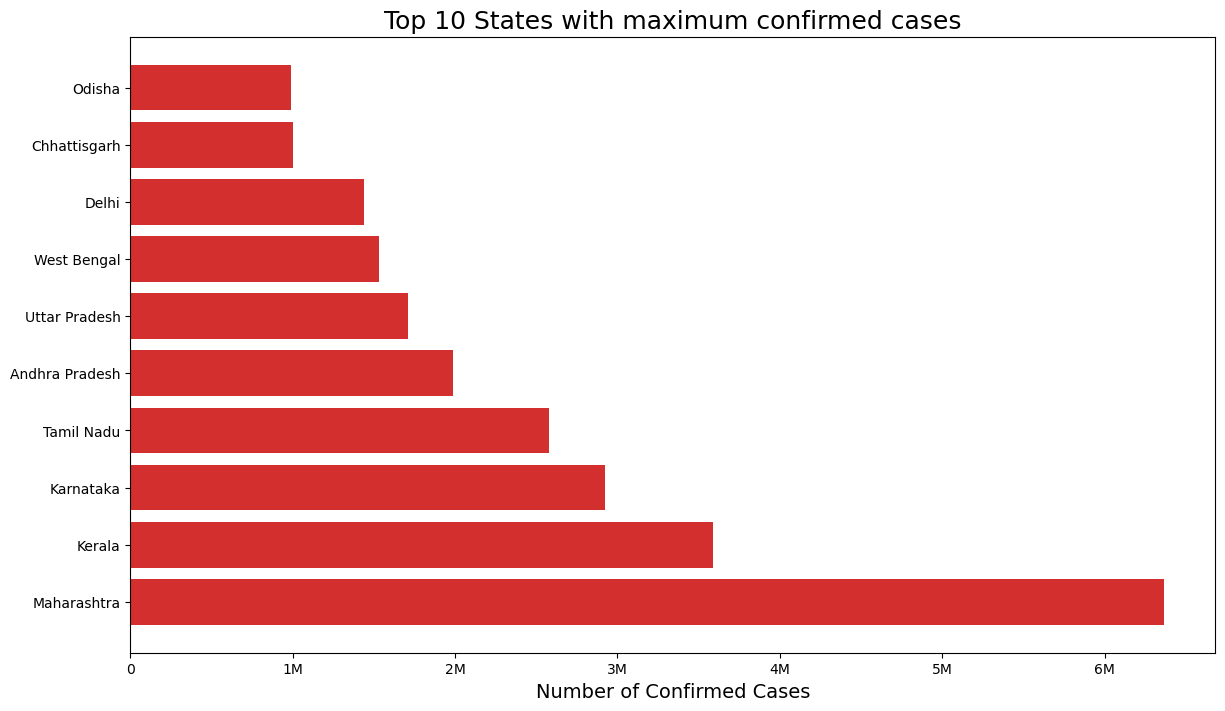

In [6]:
df_recent = df_recent.sort_values(by=['Confirmed'], ascending= False)
plt.figure(figsize =(14,8), dpi=100)
plt.barh(df_recent['State/UnionTerritory'][:10], df_recent['Confirmed'][:10],
         align='center', color='#D32F2F')
plt.xticks([0,1000000,2000000,3000000,4000000,5000000,6000000],['0','1M','2M','3M','4M','5M','6M'])
plt.xlabel('Number of Confirmed Cases', size = 14)
plt.title('Top 10 States with maximum confirmed cases', size = 18)
plt.show()

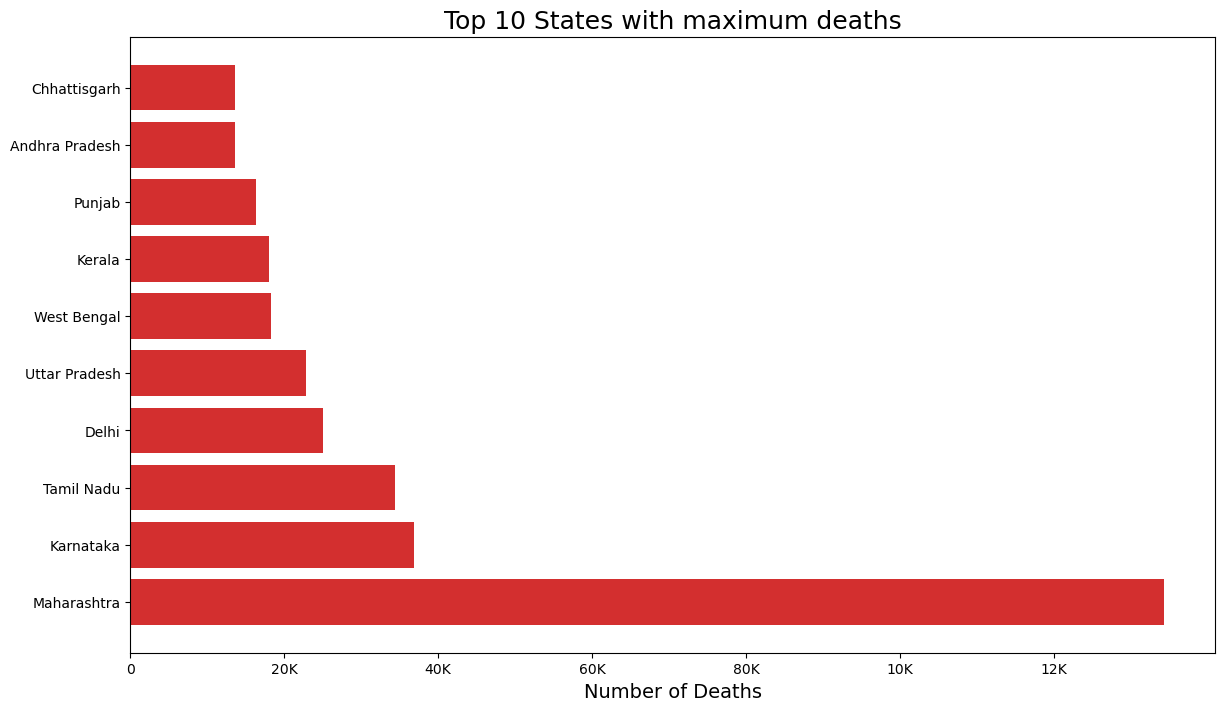

In [7]:
df_recent = df_recent.sort_values(by=['Deaths'], ascending= False)
plt.figure(figsize =(14,8), dpi=100)
plt.barh(df_recent['State/UnionTerritory'][:10], df_recent['Deaths'][:10],
         align='center', color='#D32F2F')
plt.xticks([0,20000,40000,60000,80000,100000,120000],['0','20K','40K','60K','80K','10K','12K'])
plt.xlabel('Number of Deaths', size = 14)
plt.title('Top 10 States with maximum deaths', size = 18)
plt.show()

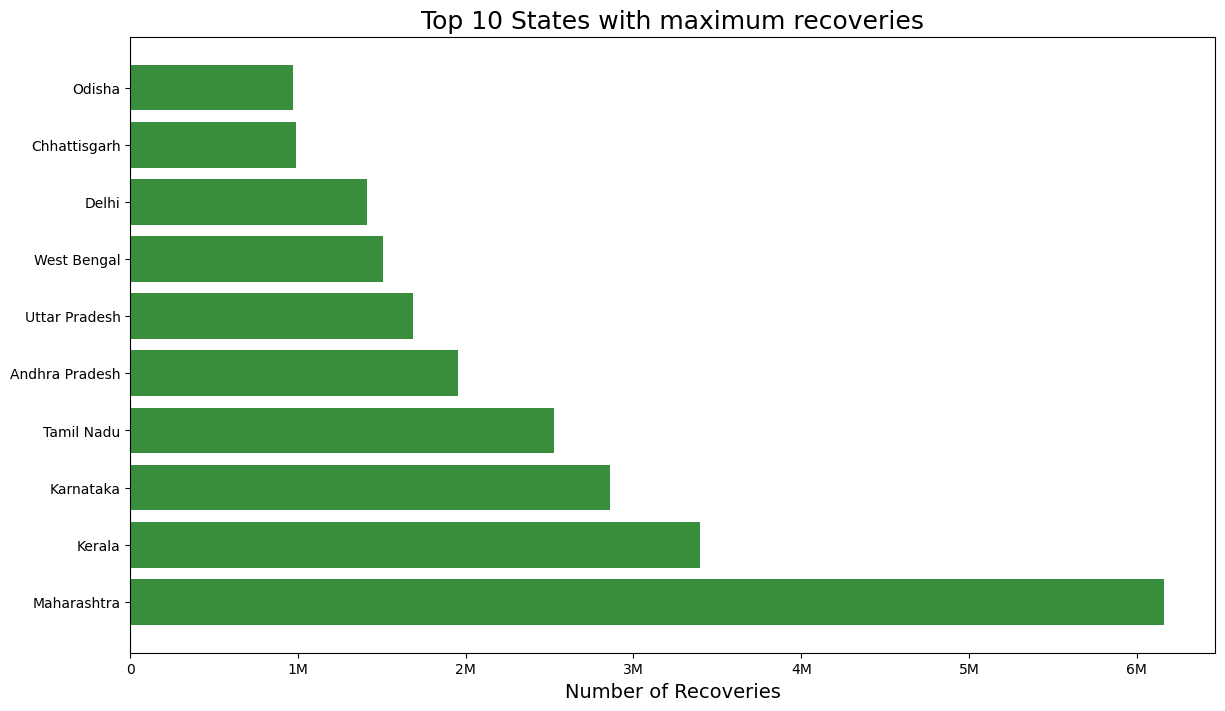

In [8]:
df_recent = df_recent.sort_values(by=['Cured'], ascending= False)
plt.figure(figsize =(14,8), dpi=100)
plt.barh(df_recent['State/UnionTerritory'][:10], df_recent['Cured'][:10],
         align='center', color='#388E3C')
plt.xticks([0,1000000,2000000,3000000,4000000,5000000,6000000],['0','1M','2M','3M','4M','5M','6M'])
plt.xlabel('Number of Recoveries', size = 14)
plt.title('Top 10 States with maximum recoveries', size = 18)
plt.show()

In [9]:
df_recent['Death Rate'] = (df_recent['Deaths'] / df_recent['Confirmed'])
df_recent.isna().sum()
df_recent

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Death Rate
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442,0.021089
18090,18091,2021-08-11,8:00 AM,Kerala,-,-,3396184,18004,3586693,0.005020
18089,18090,2021-08-11,8:00 AM,Karnataka,-,-,2861499,36848,2921049,0.012615
18104,18105,2021-08-11,8:00 AM,Tamil Nadu,-,-,2524400,34367,2579130,0.013325
18075,18076,2021-08-11,8:00 AM,Andhra Pradesh,-,-,1952736,13564,1985182,0.006833
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,0.013328
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,0.011891
18082,18083,2021-08-11,8:00 AM,Delhi,-,-,1411280,25068,1436852,0.017446
18080,18081,2021-08-11,8:00 AM,Chhattisgarh,-,-,988189,13544,1003356,0.013499
18099,18100,2021-08-11,8:00 AM,Odisha,-,-,972710,6565,988997,0.006638


In [10]:
df_recent['Recovery Rate'] = (df_recent['Cured'] / df_recent['Confirmed'])
df_recent

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Death Rate,Recovery Rate
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442,0.021089,0.967979
18090,18091,2021-08-11,8:00 AM,Kerala,-,-,3396184,18004,3586693,0.005020,0.946884
18089,18090,2021-08-11,8:00 AM,Karnataka,-,-,2861499,36848,2921049,0.012615,0.979613
18104,18105,2021-08-11,8:00 AM,Tamil Nadu,-,-,2524400,34367,2579130,0.013325,0.978780
18075,18076,2021-08-11,8:00 AM,Andhra Pradesh,-,-,1952736,13564,1985182,0.006833,0.983656
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,0.013328,0.986353
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,0.011891,0.981455
18082,18083,2021-08-11,8:00 AM,Delhi,-,-,1411280,25068,1436852,0.017446,0.982203
18080,18081,2021-08-11,8:00 AM,Chhattisgarh,-,-,988189,13544,1003356,0.013499,0.984884
18099,18100,2021-08-11,8:00 AM,Odisha,-,-,972710,6565,988997,0.006638,0.983532


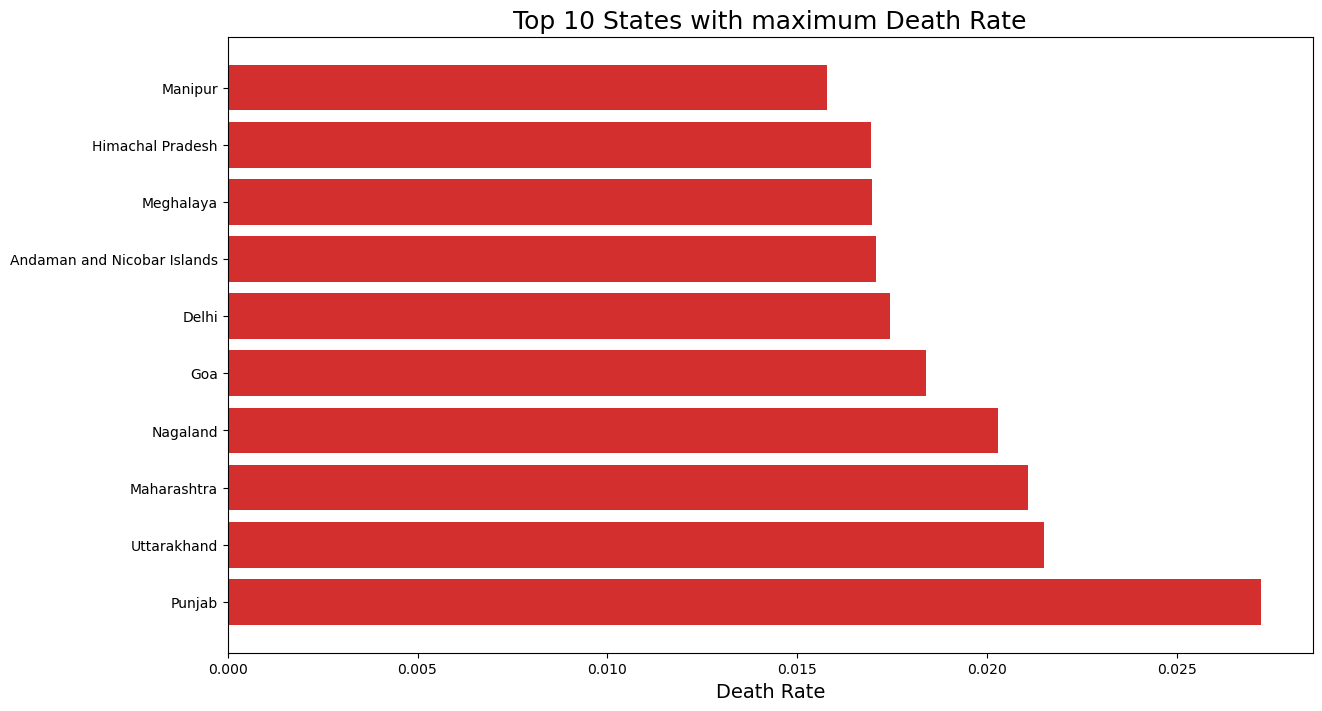

In [11]:
df_recent = df_recent.sort_values(by = ['Death Rate'], ascending=False)
plt.figure(figsize =(14,8), dpi=100)
plt.barh(df_recent['State/UnionTerritory'][:10], df_recent['Death Rate'][:10],
         align='center', color='#D32F2F')
plt.xlabel('Death Rate', size = 14)
plt.title('Top 10 States with maximum Death Rate', size = 18)
plt.show()

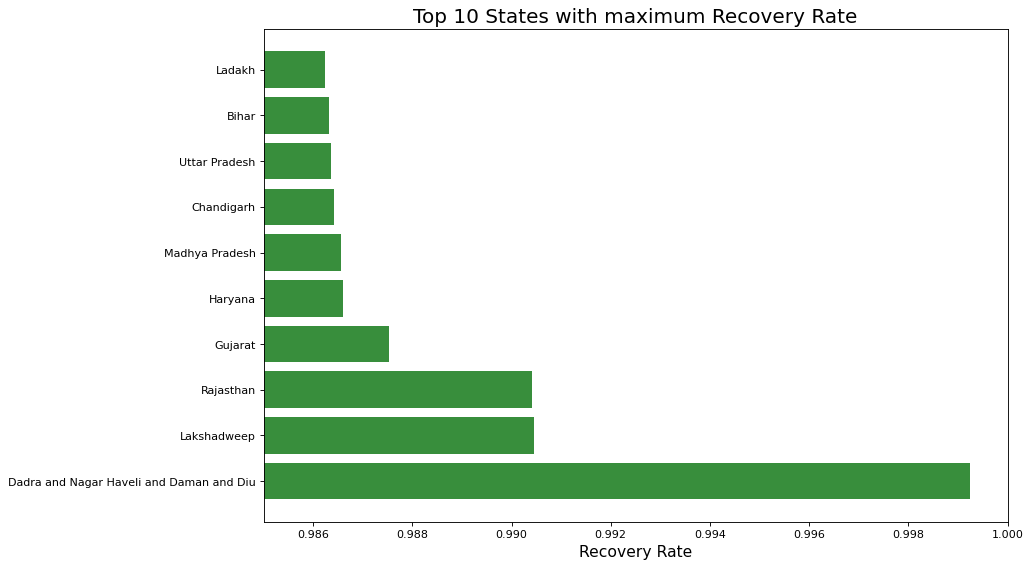

In [12]:
df_recent = df_recent.sort_values(by = ['Recovery Rate'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.barh(df_recent['State/UnionTerritory'][:10], df_recent['Recovery Rate'][:10], 
        align='center',color='#388E3C')
plt.xlabel('Recovery Rate', size = 14)
plt.xlim(0.985,1)
plt.title('Top 10 States with maximum Recovery Rate', size = 18)
plt.show()

# State wise

In [13]:
df1

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


In [14]:
print("Missing values distribution: ")
print(df1.isnull())
print("")

Missing values distribution: 
        Date  State  TotalSamples  Negative  Positive
0      False  False         False     False     False
1      False  False         False      True     False
2      False  False         False      True     False
3      False  False         False      True     False
4      False  False         False      True     False
...      ...    ...           ...       ...       ...
16331  False  False         False      True      True
16332  False  False         False      True      True
16333  False  False         False      True      True
16334  False  False         False      True      True
16335  False  False         False      True      True

[16336 rows x 5 columns]



In [18]:
print("Number of missing values in distribution: ")
df1.isnull().sum()

Number of missing values in distribution: 


Date                0
State               0
TotalSamples        0
Negative         9367
Positive        10674
dtype: int64

In [20]:
df1.dtypes

Date             object
State            object
TotalSamples    float64
Negative         object
Positive        float64
dtype: object

In [28]:
df1['Negative'] = pd.to_numeric(df1['Negative'], errors = 'coerce')

In [31]:
df1.dtypes

Date             object
State            object
TotalSamples    float64
Negative        float64
Positive        float64
dtype: object

In [32]:
df1

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN
